In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install optuna

     |████████████████████████████████| 296kB 6.7MB/s 
     |████████████████████████████████| 163kB 17.6MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 143kB 17.7MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 112kB 17.3MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=f3b1efcb85255d9a2a01e3fd6e7b37353fd4c7d18db9e6ce0e059c2a1738ea15
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [3]:
pip install catboost --no-cache-dir

     |████████████████████████████████| 67.3MB 1.3MB/s 


In [4]:
pip install shap


     |████████████████████████████████| 358kB 5.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491623 sha256=754ad05ce5ee12315839d7b14a2f624f449f4444f5ce5ddcfbf9c398ce4f0a1e
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [5]:
pip install -I shap


Processing /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283/shap-0.39.0-cp37-cp37m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl
     |████████████████████████████████| 15.3MB 310kB/s 
     |████████████████████████████████| 9.9MB 26.5MB/s 
     |████████████████████████████████| 27.4MB 137kB/s 
     |████████████████████████████████| 3.4MB 27.8MB/s 
     |████████████████████████████████| 22.3MB 1.7MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 512kB 50.7MB/s 
     |████████████████████████████████| 235kB 48.0MB/s 
     |████████████████████████████████| 25.3MB 145kB/s 
     |████████████████████████████████| 788kB 37.2MB/s 
     |████████████████████████████████| 307kB 51.6MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incomp

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import optuna
import xgboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import shap
import pandas as pd

from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder



In [164]:
# Import dataset
train = pd.read_csv("/content/drive/MyDrive/Ignacio Fiori Training/Machine Learning/Titanic/train.csv")

**Exploration and Preprocessing of Data**

In [165]:
train.shape

(891, 12)

In [166]:
train, test=train_test_split(train, test_size=.2)

In [167]:
train.shape

(712, 12)

In [168]:
test.shape

(179, 12)

In [169]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S


In [170]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.000,B94,S
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.050,NaN,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 110 to 663
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        162 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [172]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,565.000000,712.000000,712.000000,712.000000
mean,450.936798,0.379213,2.297753,29.817398,0.508427,0.370787,32.130160
std,258.348270,0.485532,0.841000,14.591541,1.089490,0.800942,50.384874
min,3.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,2.000000,20.500000,0.000000,0.000000,7.895800
50%,453.500000,0.000000,3.000000,28.500000,0.000000,0.000000,14.772900
75%,675.250000,1.000000,3.000000,39.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that about 36% of the passengers survived. Also the passengers age range from 0.4 to 80. Besides there are missing values

In [173]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C


From the information above, we can note some things. First of all, that we need to convert a lot of features into numeric ones, so that the machine learning algorithms can process them. Besides, we can see that the features have different ranges, we will need to convert into the same scale. Finally there are also other features with missing valures(NaN).

In [174]:
train_missing = train.isna().sum() / train.shape[0]
train_missing[train_missing > 0.0]

Age         0.206461
Cabin       0.772472
Embarked    0.001404
dtype: float64

In [175]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:3])
print(null)

            0
Cabin     550
Age       147
Embarked    1


In [176]:
test_missing = test.isna().sum() / train.shape[0]
test_missing[test_missing > 0.0]

Age         0.042135
Cabin       0.192416
Embarked    0.001404
dtype: float64

In [177]:
null=pd.DataFrame(test.isnull().sum().sort_values(ascending=False)[:3])
print(null)

            0
Cabin     137
Age        30
Embarked    1


From these results we can see that we will deal in a easier way with Embarked feature that with Age and Cabin.

In [178]:
train.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [179]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.030991,-0.033283,0.027050,-0.060213,-0.008947,0.006651
Survived,-0.030991,1.000000,-0.335463,-0.066361,-0.035297,0.082777,0.229820
Pclass,-0.033283,-0.335463,1.000000,-0.363634,0.093963,0.030053,-0.530099
Age,0.027050,-0.066361,-0.363634,1.000000,-0.312634,-0.196135,0.096718
SibSp,-0.060213,-0.035297,0.093963,-0.312634,1.000000,0.410642,0.141341
Parch,-0.008947,0.082777,0.030053,-0.196135,0.410642,1.000000,0.187436
Fare,0.006651,0.229820,-0.530099,0.096718,0.141341,0.187436,1.000000


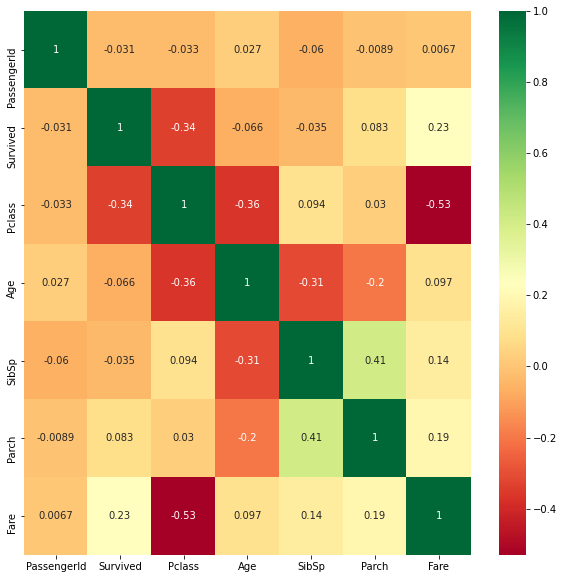

In [180]:
# most correlated features
plt.figure(figsize=(10,10))
g = sns.heatmap(train.corr(),annot=True,cmap="RdYlGn")

- Parch and SibSp seem to be correlated
- Fare and Pclass seem to be negative correlated

In [181]:
print(train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

        Survived
Pclass          
1       0.610169
2       0.486301
3       0.233933


People of upper class tend have more probability of survive

In [182]:
print(train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False))

        Survived
Sex             
female  0.742063
male    0.180435


Womens have more probability of survive than men

In [183]:
print(train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False))

       Survived
SibSp          
1      0.525316
2      0.476190
0      0.345455
3      0.214286
4      0.200000
5      0.000000
8      0.000000


In [184]:
print(train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False))

       Survived
Parch          
3      0.600000
1      0.539326
2      0.523810
0      0.339416
4      0.000000
5      0.000000
6      0.000000


SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [185]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()


1    439
0    273
Name: not_alone, dtype: int64

In [186]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S,0,1
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S,1,0
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0,1
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,0,1
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S,0,1


In [187]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.000,B94,S,0,1
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.050,NaN,S,0,1
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.000,NaN,S,1,0
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,6,0
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C,0,1


In [188]:
print(train[["relatives", "Survived"]].groupby(['relatives']).mean().sort_values(by='Survived', ascending=False))

           Survived
relatives          
3          0.818182
2          0.562500
1          0.549180
6          0.333333
0          0.302961
4          0.181818
5          0.105263
7          0.000000
10         0.000000


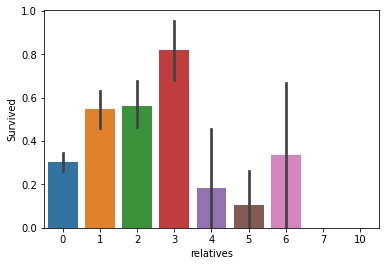

In [189]:
sns.barplot(x='relatives', y='Survived', data=train)


People with few relative have a good probability of survive. Surprisingly people with 6 relatives also has a good probability of survive.

In [190]:
train['relatives'].describe()

count    712.000000
mean       0.879213
std        1.595357
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: relatives, dtype: float64

In [191]:
train['relatives'].value_counts()

0     439
1     122
2      80
3      22
5      19
4      11
6       9
7       5
10      5
Name: relatives, dtype: int64

**Data Preprocessing**

First, I will drop ‘PassengerId’ from the train set.

In [192]:
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

In [193]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)


In [194]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
110,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,S,0,1,3
272,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,S,1,0,8
527,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,S,0,1,3
731,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C,0,1,8
121,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,S,0,1,8


In [195]:
test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.000,S,0,1,2
465,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.050,S,0,1,8
518,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.000,S,1,0,8
542,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,S,6,0,8
773,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,C,0,1,8


**AGE**

Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [196]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = train["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
train["Age"].isnull().sum()

0

**EMBARKED**

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one

In [197]:
common_value = 'S'
train['Embarked'] = train['Embarked'].fillna(common_value)
test['Embarked'] = test['Embarked'].fillna(common_value)

In [198]:
null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:3])
print(null)

          0
Survived  0
Pclass    0
Name      0


In [199]:
null=pd.DataFrame(test.isnull().sum().sort_values(ascending=False)[:3])
print(null)

          0
Survived  0
Pclass    0
Name      0


**Converting Features**

In [200]:
train.dtypes

Survived       int64
Pclass         int64
Name          object
Sex           object
Age            int64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked      object
relatives      int64
not_alone      int64
Deck           int64
dtype: object

**Fare**

Converting “Fare” from float to int64, using the “astype()” function that pandas provides:


In [201]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**Name**

We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that

In [202]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

**Sex**

Convert ‘Sex’ feature into numeric.


In [203]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

**Ticket**

In [204]:
train['Ticket'].describe()


count      712
unique     569
top       1601
freq         6
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [205]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

**Embarked**

Convert ‘Embarked’ feature into numeric.


In [206]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Creating Categories**

**Age**

Now we need to convert the age feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group.

In [207]:
age_slice, bins = pd.qcut(train['Age'], 10, retbins=True)
train['Age'] = age_slice

In [208]:
test['Age'] = pd.cut(test["Age"], bins=bins)

In [209]:
data = [train, test]
for dataset in data:
  dataset['Age'] = LabelEncoder().fit_transform(dataset['Age'])

In [210]:
train['Age'].value_counts()

0    89
4    86
7    77
8    72
3    71
5    69
1    66
9    65
2    60
6    57
Name: Age, dtype: int64

In [211]:
test['Age'].value_counts()

3     22
7     22
0     21
2     21
4     18
6     16
8     15
9     15
1     14
5     12
10     3
Name: Age, dtype: int64

In [212]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
110,0,1,0,8,0,0,52,0,0,1,3,1
272,1,2,1,8,0,1,19,0,1,0,8,3
527,0,1,0,7,0,0,221,0,0,1,3,1
731,0,3,0,0,0,0,18,1,0,1,8,1
121,0,3,0,1,0,0,8,0,0,1,8,1


In [213]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
263,0,1,0,7,0,0,0,0,0,1,2,1
465,0,3,0,7,0,0,7,0,0,1,8,1
518,1,2,1,7,1,0,26,0,1,0,8,3
542,0,3,1,0,4,2,31,0,6,0,8,2
773,0,3,0,5,0,0,7,1,0,1,8,1


**Fare**

For the Fare feature, we need to do the same as with the ‘Age’ feature.

In [214]:
fare_slice, bins = pd.qcut(train['Fare'], 6, retbins=True)
train['Fare'] = fare_slice

In [215]:
test['Fare'] = pd.cut(test["Fare"], bins=bins)

In [216]:
train['Fare'].value_counts()

(-0.001, 7.0]    190
(14.5, 26.0]     138
(52.0, 512.0]    117
(8.0, 14.5]      108
(26.0, 52.0]     101
(7.0, 8.0]        58
Name: Fare, dtype: int64

In [217]:
test['Fare'].value_counts()

(0.0, 7.0]       48
(8.0, 14.5]      38
(52.0, 512.0]    29
(14.5, 26.0]     27
(26.0, 52.0]     22
(7.0, 8.0]       12
Name: Fare, dtype: int64

In [218]:
data = [train, test]
for dataset in data:
  dataset['Fare'] = LabelEncoder().fit_transform(dataset['Fare'])

In [219]:
train['Fare'].value_counts()

0    190
3    138
5    117
2    108
4    101
1     58
Name: Fare, dtype: int64

In [220]:
test['Fare'].value_counts()

0    48
2    38
5    29
3    27
4    22
1    12
6     3
Name: Fare, dtype: int64

In [221]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
110,0,1,0,8,0,0,4,0,0,1,3,1
272,1,2,1,8,0,1,3,0,1,0,8,3
527,0,1,0,7,0,0,5,0,0,1,3,1
731,0,3,0,0,0,0,3,1,0,1,8,1
121,0,3,0,1,0,0,1,0,0,1,8,1


In [222]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
263,0,1,0,7,0,0,6,0,0,1,2,1
465,0,3,0,7,0,0,0,0,0,1,8,1
518,1,2,1,7,1,0,3,0,1,0,8,3
542,0,3,1,0,4,2,4,0,6,0,8,2
773,0,3,0,5,0,0,0,1,0,1,8,1


In [223]:
train.dtypes

Survived     int64
Pclass       int64
Sex          int64
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked     int64
relatives    int64
not_alone    int64
Deck         int64
Title        int64
dtype: object

**Model**

In [224]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [225]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1)
y_test = test["Survived"]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 11)
(179, 11)
(712,)
(179,)



**Random Forest:**

In [226]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.79      0.75      0.77        72

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



**Logistic Regression:**


In [227]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       107
           1       0.76      0.67      0.71        72

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



**Perceptron:**

In [228]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       107
           1       0.82      0.39      0.53        72

    accuracy                           0.72       179
   macro avg       0.76      0.67      0.66       179
weighted avg       0.75      0.72      0.69       179



**CatBoost**

In [229]:
cat = CatBoostClassifier()


cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

print(classification_report(y_test,y_pred))

Learning rate set to 0.008911
0:	learn: 0.6870700	total: 786us	remaining: 785ms
1:	learn: 0.6810856	total: 3.11ms	remaining: 1.55s
2:	learn: 0.6754336	total: 4.46ms	remaining: 1.48s
3:	learn: 0.6701937	total: 5.25ms	remaining: 1.31s
4:	learn: 0.6647969	total: 6.08ms	remaining: 1.21s
5:	learn: 0.6587539	total: 6.86ms	remaining: 1.14s
6:	learn: 0.6531107	total: 7.64ms	remaining: 1.08s
7:	learn: 0.6481595	total: 8.4ms	remaining: 1.04s
8:	learn: 0.6426887	total: 9.18ms	remaining: 1.01s
9:	learn: 0.6371922	total: 9.93ms	remaining: 983ms
10:	learn: 0.6326697	total: 10.7ms	remaining: 959ms
11:	learn: 0.6283144	total: 11.5ms	remaining: 950ms
12:	learn: 0.6231900	total: 13.3ms	remaining: 1.01s
13:	learn: 0.6192309	total: 14.2ms	remaining: 998ms
14:	learn: 0.6145777	total: 14.9ms	remaining: 981ms
15:	learn: 0.6105473	total: 15.8ms	remaining: 972ms
16:	learn: 0.6071150	total: 16.6ms	remaining: 959ms
17:	learn: 0.6025787	total: 17.4ms	remaining: 949ms
18:	learn: 0.5983337	total: 18.4ms	remaining: 

**XGBoost**

In [230]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.81      0.72      0.76        72

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



**Light GBM**

In [233]:
lgb = lgb.LGBMClassifier()

lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.83      0.72      0.77        72

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



Let's make use of optuna to find optimal values for random forest and xgb boost for example.

In [70]:
RANDOM_SEED = 42

# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

# Define the helper function so that it can be reused
def tune(objective):
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=1000)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

In [ ]:
##################
# XGBoost
##################
def xgboost_objective(trial):
    _colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 0.9, log = True)
    _gamma = trial.suggest_int("gamma", 0, 10)
    _learning_rate = trial.suggest_float("learning_rate", 0.1, 0.6, log = True)
    _max_depth = trial.suggest_int("max_depth", 3, 9)
    _min_child_weight = trial.suggest_int("min_child_weight", 1, 9)
    _reg_alpha = trial.suggest_float("reg_alpha", 0.3, 0.9, log = True)
    _reg_lambda = trial.suggest_float("reg_lambda", 0.3, 0.9, log = True)
    _subsample = trial.suggest_float("subsample", 0.1, 0.9, log = True)
    xgb = xgboost.XGBClassifier(
        colsample_bytree=_colsample_bytree,
        gamma = _gamma,
        learning_rate = _learning_rate,
        max_depth = _max_depth,
        min_child_weight = _min_child_weight,
        reg_alpha = _reg_alpha,
        reg_lambda = _reg_lambda,
        subsample = _subsample,
        n_jobs=-1,
        random_state=RANDOM_SEED,
    )

    scores = cross_val_score(
        xgb, X_train, y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    )
    return scores.mean()

xgboost_params = tune(xgboost_objective)
xgb = xgboost.XGBClassifier(n_jobs=-1, random_state=RANDOM_SEED, **xgboost_params)

[I 2021-04-27 21:44:36,315] A new study created in memory with name: no-name-44d7f1cd-2752-4079-9da5-6372370fcf6e
[I 2021-04-27 21:44:36,552] Trial 0 finished with value: -0.46310311784370556 and parameters: {'colsample_bytree': 0.18341740784551794, 'gamma': 6, 'learning_rate': 0.5068741985568043, 'max_depth': 9, 'min_child_weight': 1, 'reg_alpha': 0.7137095122846646, 'reg_lambda': 0.4711459153654277, 'subsample': 0.1322353992230726}. Best is trial 0 with value: -0.46310311784370556.
[I 2021-04-27 21:44:36,830] Trial 1 finished with value: -0.45387118557757977 and parameters: {'colsample_bytree': 0.4776596444439612, 'gamma': 9, 'learning_rate': 0.44358301827255897, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.48586773249638127, 'reg_lambda': 0.8675716304808782, 'subsample': 0.28316223522913575}. Best is trial 0 with value: -0.46310311784370556.
[I 2021-04-27 21:44:37,133] Trial 2 finished with value: -0.4096668278785801 and parameters: {'colsample_bytree': 0.2985600005233582, 

Best score: -0.6242399504778383

Optimized parameters: {'colsample_bytree': 0.5757727091451206, 'gamma': 2, 'learning_rate': 0.17237005261852328, 'max_depth': 3, 'min_child_weight': 9, 'reg_alpha': 0.8987659713135158, 'reg_lambda': 0.6176888223218191, 'subsample': 0.10030162588355207}



In [235]:
xgb = XGBClassifier(colsample_bytree = 0.5757727091451206, 
                    gamma = 2, 
                    learning_rate = 0.17237005261852328, 
                    max_depth = 3, 
                    min_child_weight = 9, 
                    reg_alpha = 0.8987659713135158, 
                    reg_lambda = 0.6176888223218191, 
                    subsample = 0.10030162588355207)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.96      0.81       107
           1       0.88      0.40      0.55        72

    accuracy                           0.74       179
   macro avg       0.79      0.68      0.68       179
weighted avg       0.78      0.74      0.71       179



In [ ]:
##################
# Random Forest
##################
def randomforest_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 300, 900)
    _max_depth = trial.suggest_int("max_depth", 5, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 10)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    _max_features = trial.suggest_int("max_features", 2, 10)

    rf = RandomForestClassifier(
        max_depth=_max_depth,
        min_samples_split=_min_samp_split,
        min_samples_leaf=_min_samples_leaf,
        max_features=_max_features,
        n_estimators=_n_estimators,
        n_jobs=-1,
        random_state=RANDOM_SEED,
    )

    scores = cross_val_score(
        rf, X_train, y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    )
    return scores.mean()

randomforest_params = tune(randomforest_objective)
rf = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_SEED, **randomforest_params)

[I 2021-04-27 21:26:49,800] A new study created in memory with name: no-name-7c0b58a9-ae15-47de-bf16-4d93ff3728a3
[I 2021-04-27 21:26:58,507] Trial 0 finished with value: -0.4276045930625331 and parameters: {'n_estimators': 361, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 5}. Best is trial 0 with value: -0.4276045930625331.
[I 2021-04-27 21:27:06,394] Trial 1 finished with value: -0.42136264402264256 and parameters: {'n_estimators': 391, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 6}. Best is trial 0 with value: -0.4276045930625331.
[I 2021-04-27 21:27:18,343] Trial 2 finished with value: -0.4237995696231252 and parameters: {'n_estimators': 622, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 2}. Best is trial 0 with value: -0.4276045930625331.
[I 2021-04-27 21:27:31,634] Trial 3 finished with value: -0.4186922667901209 and parameters: {'n_estimators': 672, 'max_depth': 17, 'min_sampl

Best score: -0.43463981149782105

Optimized parameters: {'n_estimators': 447, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 7}



In [236]:
random_forest = RandomForestClassifier(n_estimators = 447, max_depth = 8, min_samples_leaf = 9, min_samples_split = 10, max_features=7)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       107
           1       0.85      0.71      0.77        72

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [237]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.81      0.72      0.76        72

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [238]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.79      0.75      0.77        72

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



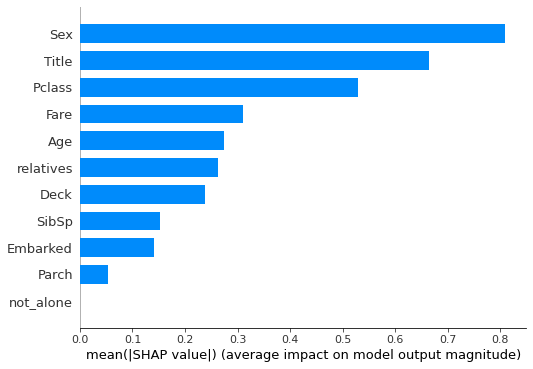

In [239]:
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test, y_test, approximate=True)

shap.summary_plot(shap_values_xgb, X_test, plot_type = 'bar')

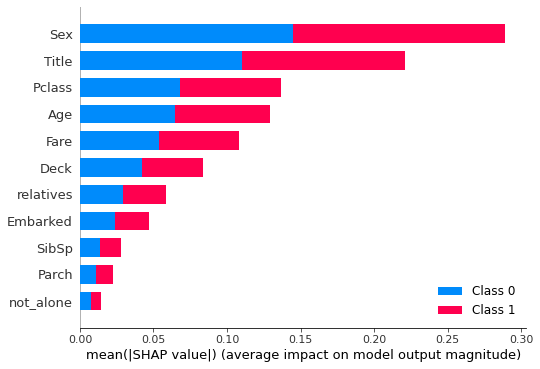

In [240]:
explainer_rfc = shap.TreeExplainer(rfc)
shap_values_rfc = explainer_rfc.shap_values(X_test, y_test, approximate=True)

shap.summary_plot(shap_values_rfc, X_test, plot_type = 'bar')

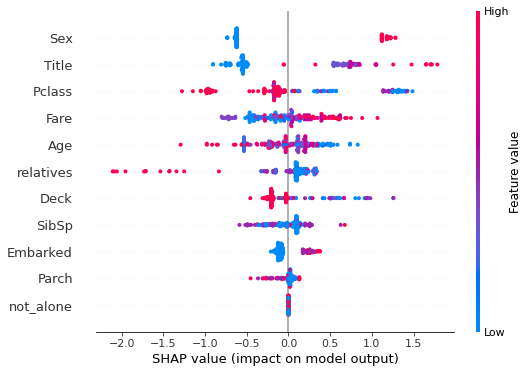

In [241]:
shap.summary_plot(shap_values_xgb, X_test)

Sex is the most important feature and it seems that women have more probability of survive than men. Title is also very important and the low values as Mrs for example tend to die. People who have low class of ticket tend to die also. About age children seem to survive.

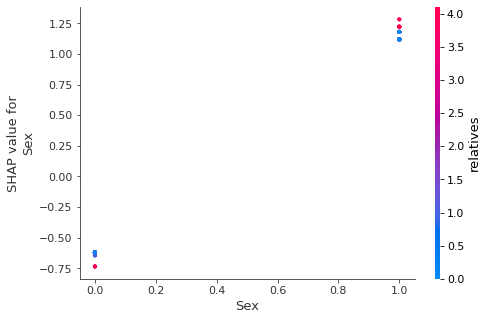

In [242]:
shap.dependence_plot("Sex", shap_values_xgb, X_test)


Female tend to survive whereas Men tend to die

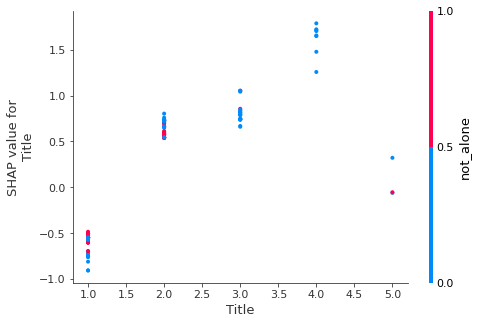

In [243]:
shap.dependence_plot("Title", shap_values_xgb, X_test)


Mrs and Rare categories tend to die.

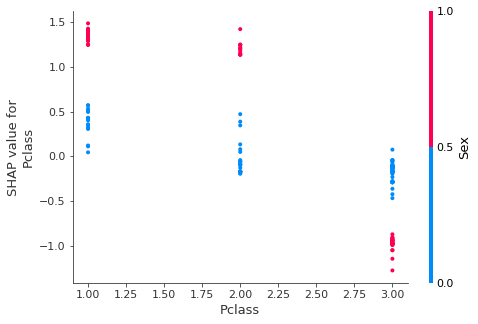

In [244]:
shap.dependence_plot("Pclass", shap_values_xgb, X_test)


People who have the lowest class tend to die

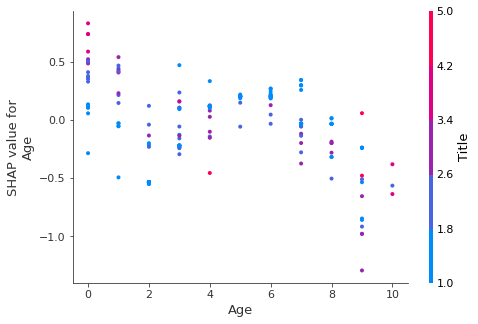

In [247]:
shap.dependence_plot("Age", shap_values_xgb, X_test)


Children tend to survive. Older people tend to die

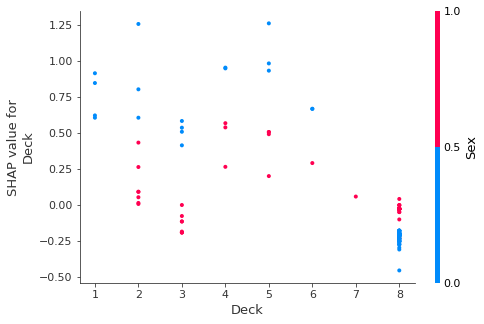

In [249]:
shap.dependence_plot("Deck", shap_values_xgb, X_test)


People from the U cabin tend to die. There are other decks with more probability of survive

In [250]:
real_value=pd.DataFrame({'survive':y_test})
predict_value=pd.DataFrame({'survive':y_pred})
with pd.ExcelWriter('c:\\test.xls') as writer:
    real_value.to_excel(writer, sheet_name='Sheet1')
    predict_value.to_excel(writer, sheet_name='Sheet2')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.


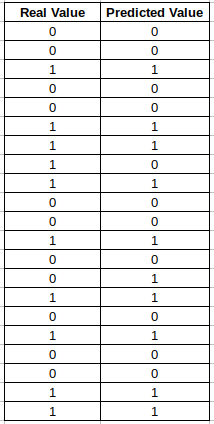

In [255]:
X_test.loc[305, [ 
'Sex',
'Title',
'Pclass',
'Fare',
'Age',
'relatives',
'Deck',
'SibSp',
'Embarked',
'Parch',
'not_alone' ]]

Sex           0
Title         4
Pclass        1
Fare          5
Age          10
relatives     3
Deck          3
SibSp         1
Embarked      0
Parch         2
not_alone     0
Name: 305, dtype: int64

In [252]:
print("The real value is: " + str(y_test.loc[305]))
print("The predicted value is: " + str(y_pred[7]))

The real value is: 1
The predicted value is: 0


In [257]:
example = X_test.loc[305,:]
shap.initjs()

shap_values_Model = explainer_xgb.shap_values(example)
shap.force_plot(explainer_xgb.expected_value, shap_values_Model, example)

It seems that the value of Sex and Age are making our prediction to be 0 when it should be 1.

In [258]:
X_test.loc[388, [ 
'Sex',
'Title',
'Pclass',
'Fare',
'Age',
'relatives',
'Deck',
'SibSp',
'Embarked',
'Parch',
'not_alone' ]]

Sex          0
Title        1
Pclass       3
Fare         0
Age          6
relatives    0
Deck         8
SibSp        0
Embarked     2
Parch        0
not_alone    1
Name: 388, dtype: int64

In [254]:
print("The real value is: " + str(y_test.loc[388]))
print("The predicted value is: " + str(y_pred[13]))

The real value is: 0
The predicted value is: 1


In [259]:
example = X_test.loc[388,:]
shap.initjs()

shap_values_Model = explainer_xgb.shap_values(example)
shap.force_plot(explainer_xgb.expected_value, shap_values_Model, example)

It's clear that by looking at the values of the features it should be a 0. Values of Sex, Title, Pclass, Deck, all of them are the highest in order to die.

In [260]:
X_test.loc[38, [ 
'Sex',
'Title',
'Pclass',
'Fare',
'Age',
'relatives',
'Deck',
'SibSp',
'Embarked',
'Parch',
'not_alone' ]]

Sex          1
Title        2
Pclass       3
Fare         3
Age          1
relatives    2
Deck         8
SibSp        2
Embarked     0
Parch        0
not_alone    0
Name: 38, dtype: int64

In [261]:
print("The real value is: " + str(y_test.loc[38]))
print("The predicted value is: " + str(y_pred[25]))

The real value is: 0
The predicted value is: 1


In [262]:
example = X_test.loc[38,:]
shap.initjs()

shap_values_Model = explainer_xgb.shap_values(example)
shap.force_plot(explainer_xgb.expected_value, shap_values_Model, example)

This case is a bit more difficult because we have some values that indicate that can be a survirver but some others that indicate a death. For example we have a one in Sex, a one in Age that suggest a surviver. However, we have a three in Pclass or an eight in Deck that suggest a Death.